In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
bitcoin_df = pd.read_csv('Resources/BTC/BTC-USD_Historical_Nov-2021.csv',index_col='Date', parse_dates= True)
bitcoin_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700


In [3]:
bitcoin_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
bitcoin_df = bitcoin_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
bitcoin_df.head(10)

,Close
Date,
2014-10-01,338.321014
2014-11-01,378.046997
2014-12-01,320.192993
2015-01-01,217.464005
2015-02-01,254.263000
2015-03-01,244.223999
2015-04-01,236.145004
2015-05-01,230.190002
2015-06-01,263.071991


In [6]:
bitcoin_df.dtypes

Close    float64
dtype: object

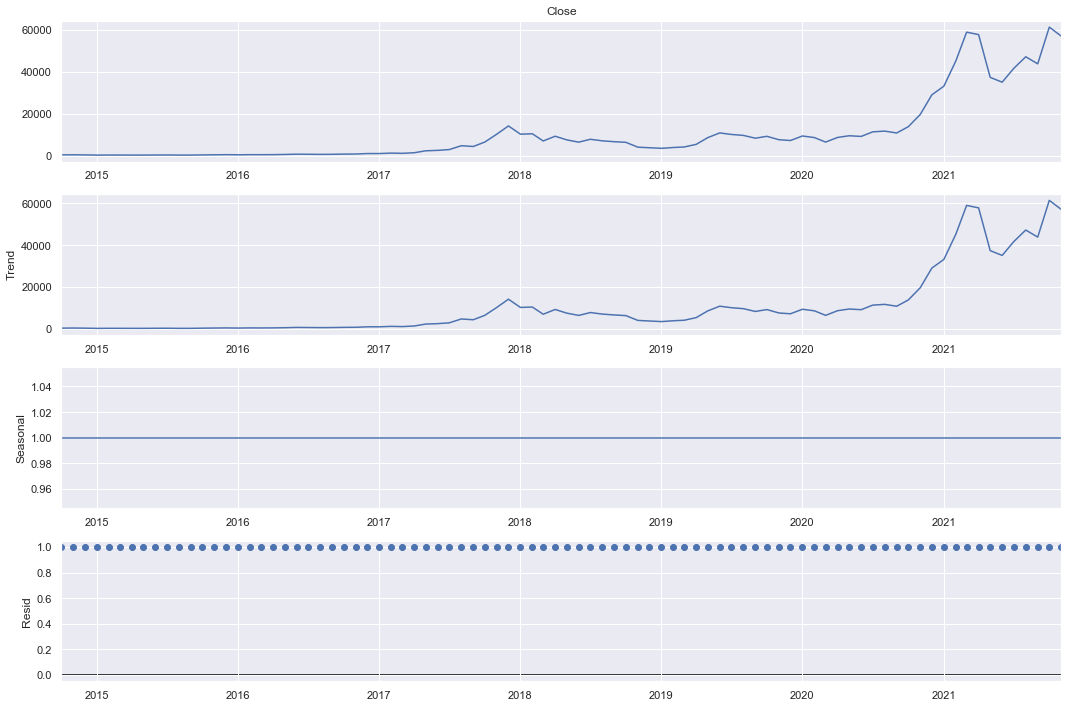

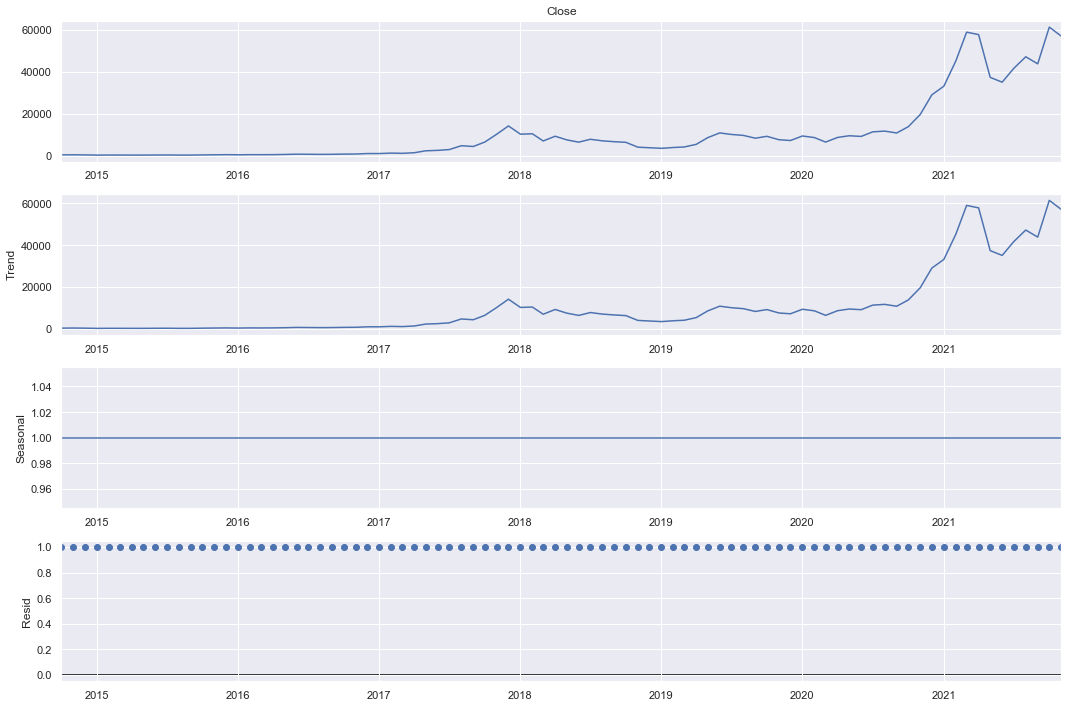

In [7]:
results = seasonal_decompose(bitcoin_df['Close'],model ='multiplicative',period=12)
plt.rcParams.update({'figure.figsize': (15,10)})
results.plot()

In [8]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(bitcoin_df['Close'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1443.488, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1445.760, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1443.739, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1441.686, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1445.819, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1441.275, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1442.129, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1444.200, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1444.236, Time=0.20 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1442.279, Time=0.13 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1442.324, Time=0.09 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1446.182, Time=0.27 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1444.374, Time=0.12 sec
 ARIMA(0,1,2)(1,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   86
Model:             SARIMAX(1, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -711.640
Date:                              Sat, 11 Dec 2021   AIC                           1435.280
Time:                                      13:41:07   BIC                           1449.023
Sample:                                           0   HQIC                          1440.757
                                               - 86                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8876      0.142     -6.271      0.000      -1.165      -0.610
ma.L1          1.2110      0.153      7.916      0.000       0.911       1.511
ma.L2          0.2010      0.129      1.560      0.119      -0.051       0.453
ma.L3         -0.3288      0.087     -3.795      0.000      -0.499      -0.159
ma.S.L12      -0.6242      0.242     -2.580      0.010      -1.098      -0.150
sigma2      1.651e+07   1.41e-08   1.17e+15      0.000    1.65e+07    1.65e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                79.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              83.70   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.11e+30. Standard errors may be unstable.
"""

In [9]:
# Split data into train / test sets
train = bitcoin_df.iloc[:len(bitcoin_df)-12]
test = bitcoin_df.iloc[len(bitcoin_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   74
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -537.986
Date:                            Sat, 11 Dec 2021   AIC                           1085.972
Time:                                    13:41:08   BIC                           1096.527
Sample:                                10-01-2014   HQIC                          1090.109
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0248      0.094      0.265      0.791      -0.159       0.208
ar.S.L12      -0.6721      0.253     -2.655      0.008      -1.168      -0.176
ar.S.L24      -0.5557      0.215     -2.589      0.010      -0.976      -0.135
ma.S.L12      -0.4105      0.368     -1.117      0.264      -1.131       0.310
sigma2      2.282e+06   4.21e+05      5.425      0.000    1.46e+06    3.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.25
Prob(Q):                              0.93   Prob(JB):                         0.32
Heteroskedasticity (H):              67.61   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

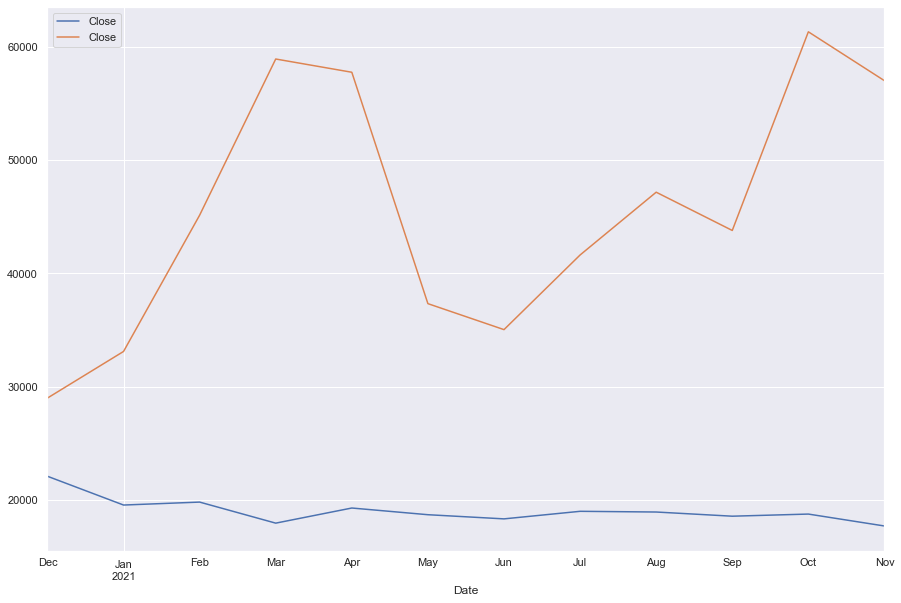

In [10]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [11]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

28797.527048456715

In [12]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

829297564.1065961

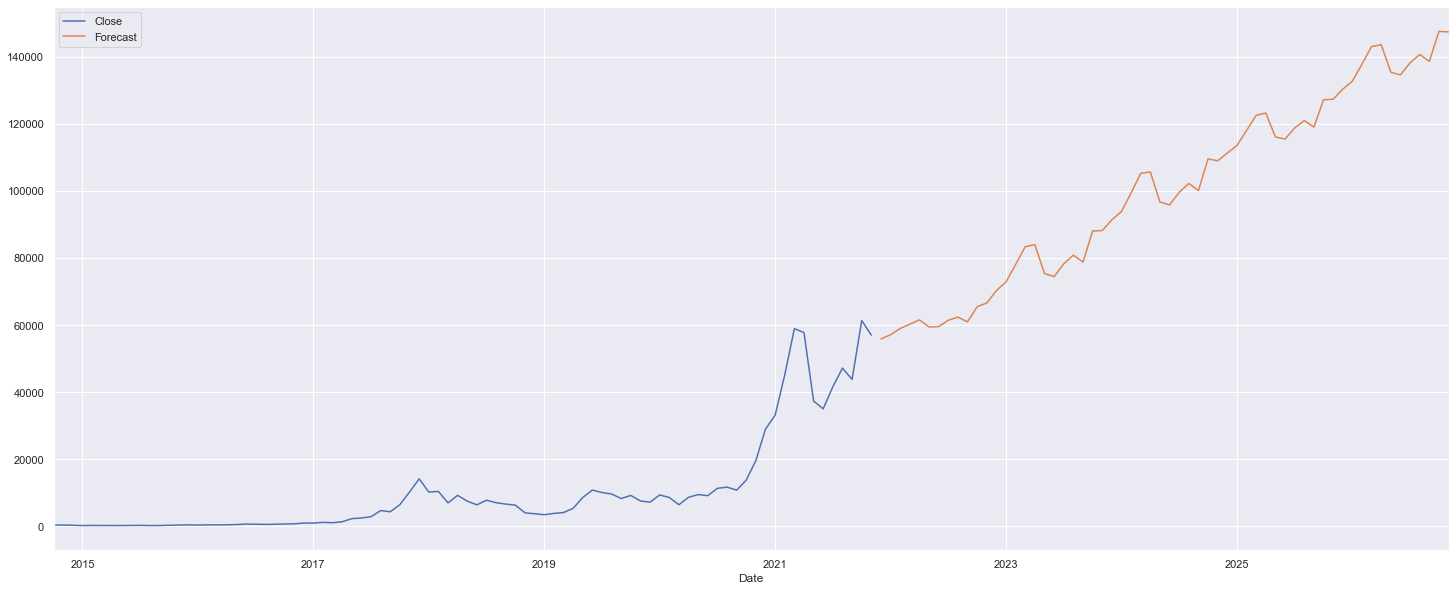

In [13]:
# Train the model on the full dataset
model = model = SARIMAX(bitcoin_df['Close'],order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 5 years
forecast = result.predict(start = len(bitcoin_df),end = (len(bitcoin_df)-1) + 5 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
bitcoin_df['Close'].plot(figsize = (25, 10), legend = True)
forecast.plot(legend = True)
